# Install & Import Libraries

In [ ]:
# Install yfinance if not installed
!pip install yfinance pandas numpy matplotlib seaborn statsmodels

# Imports
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Display all columns in DataFrame output
pd.set_option('display.max_columns', None)


# Fetch Historical Data (TSLA, BND, SPY)

In [3]:
# Define tickers and date range
tickers = ['TSLA', 'BND', 'SPY']
start_date = '2015-07-01'
end_date = '2025-07-31'

# Download data
data = yf.download(tickers, start=start_date, end=end_date, group_by='ticker', auto_adjust=False)

# Save a copy of raw data
raw_data = data.copy()

# Preview structure
data.head()


[*********************100%***********************]  3 of 3 completed


Ticker             SPY                                                  \
Price             Open        High         Low       Close   Adj Close   
Date                                                                     
2015-07-01  207.729996  208.029999  206.559998  207.500000  174.917114   
2015-07-02  208.070007  208.270004  206.809998  207.309998  174.756927   
2015-07-06  205.770004  207.649994  205.529999  206.720001  174.259567   
2015-07-07  206.960007  208.169998  204.110001  208.020004  175.355453   
2015-07-08  206.419998  206.759995  204.250000  204.529999  172.413452   

Ticker                      TSLA                                              \
Price          Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2015-07-01  135979900  18.073999  18.174667  17.856667  17.943333  17.943333   
2015-07-02  104373700  18.680000  18.830000  18.220667  18.667999  18.667999   
2015-07-06  117975400  18.591999  18.779333  18.420000  18.648001  18.648001   
2015-07-07  173820200  18.333332  18.346666  17.384666  17.858667  17.858667   
2015-07-08  164020100  17.288000  17.386667  16.954000  16.997334  16.997334   

Ticker                       BND                                              \
Price          Volume       Open       High        Low      Close  Adj Close   
Date                                                                           
2015-07-01   31518000  80.870003  81.029999  80.830002  80.900002  60.816704   
2015-07-02  107458500  81.059998  81.180000  81.059998  81.099998  60.967079   
2015-07-06   61828500  81.440002  81.440002  81.220001  81.379997  61.177547   
2015-07-07   91576500  81.690002  81.769997  81.459999  81.459999  61.237720   
2015-07-08   93316500  81.639999  81.760002  81.559998  81.690002  61.410610   

Ticker               
Price        Volume  
Date                 
2015-07-01  5399300  
2015-07-02  1060100  
2015-07-06  2210700  
2015-07-07  4183200  
2015-07-08  1967800

# Reshape Data (Make It Cleaner)

In [4]:
# Create a dictionary to store cleaned data for each asset
assets = {}

for ticker in tickers:
    df = data[ticker].copy()
    df['Ticker'] = ticker
    df.index.name = 'Date'
    assets[ticker] = df

# Example: preview TSLA data
assets['TSLA'].head()


Price,Open,High,Low,Close,Adj Close,Volume,Ticker
Date,,,,,,,
2015-07-01,18.073999,18.174667,17.856667,17.943333,17.943333,31518000,TSLA
2015-07-02,18.680000,18.830000,18.220667,18.667999,18.667999,107458500,TSLA
2015-07-06,18.591999,18.779333,18.420000,18.648001,18.648001,61828500,TSLA
2015-07-07,18.333332,18.346666,17.384666,17.858667,17.858667,91576500,TSLA
2015-07-08,17.288000,17.386667,16.954000,16.997334,16.997334,93316500,TSLA


# Basic Data Checks & Cleaning

In [5]:
for ticker, df in assets.items():
    print(f"--- {ticker} ---")
    print(df.info())
    print("Missing values per column:\n", df.isnull().sum(), "\n")

    # Fill missing values via forward fill
    df.fillna(method='ffill', inplace=True)

    # Drop rows still having NaN after forward fill
    df.dropna(inplace=True)

    assets[ticker] = df


--- TSLA ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2535 non-null   float64
 1   High       2535 non-null   float64
 2   Low        2535 non-null   float64
 3   Close      2535 non-null   float64
 4   Adj Close  2535 non-null   float64
 5   Volume     2535 non-null   int64  
 6   Ticker     2535 non-null   object 
dtypes: float64(5), int64(1), object(1)
memory usage: 158.4+ KB
None
Missing values per column:
 Price
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Ticker       0
dtype: int64 

--- BND ---
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2535 entries, 2015-07-01 to 2025-07-30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2535 non-null   float64
 1   High       2535 non

C:\Users\addis\AppData\Local\Temp\ipykernel_17076\1848392707.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\addis\AppData\Local\Temp\ipykernel_17076\1848392707.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)
C:\Users\addis\AppData\Local\Temp\ipykernel_17076\1848392707.py:7: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


# Basic Statistics

In [6]:
for ticker, df in assets.items():
    print(f"--- {ticker} Descriptive Statistics ---")
    print(df.describe(), "\n")


--- TSLA Descriptive Statistics ---
Price         Open         High          Low        Close    Adj Close  \
count  2535.000000  2535.000000  2535.000000  2535.000000  2535.000000   
mean    132.000600   134.960429   128.837831   131.963002   131.963002   
std     121.034152   123.783736   117.996631   120.914904   120.914904   
min       9.488000    10.331333     9.403333     9.578000     9.578000   
25%      18.901000    19.279667    18.575334    18.967667    18.967667   
50%      94.400665    97.666664    91.734001    94.571335    94.571335   
75%     235.851669   240.881668   232.170006   236.761665   236.761665   
max     475.899994   488.540009   457.510010   479.859985   479.859985   

Price        Volume  
count  2.535000e+03  
mean   1.141789e+08  
std    7.332146e+07  
min    1.062000e+07  
25%    6.908220e+07  
50%    9.537450e+07  
75%    1.322551e+08  
max    9.140820e+08   

--- BND Descriptive Statistics ---
Price         Open         High          Low        Close    A

# Calculate Daily Returns & Volatility

In [7]:
for ticker, df in assets.items():
    # Daily % change
    df['Daily_Return'] = df['Adj Close'].pct_change()

    # Rolling volatility (30-day window)
    df['Rolling_Volatility'] = df['Daily_Return'].rolling(window=30).std()

    assets[ticker] = df


# EDA: Price Trends & Volatility

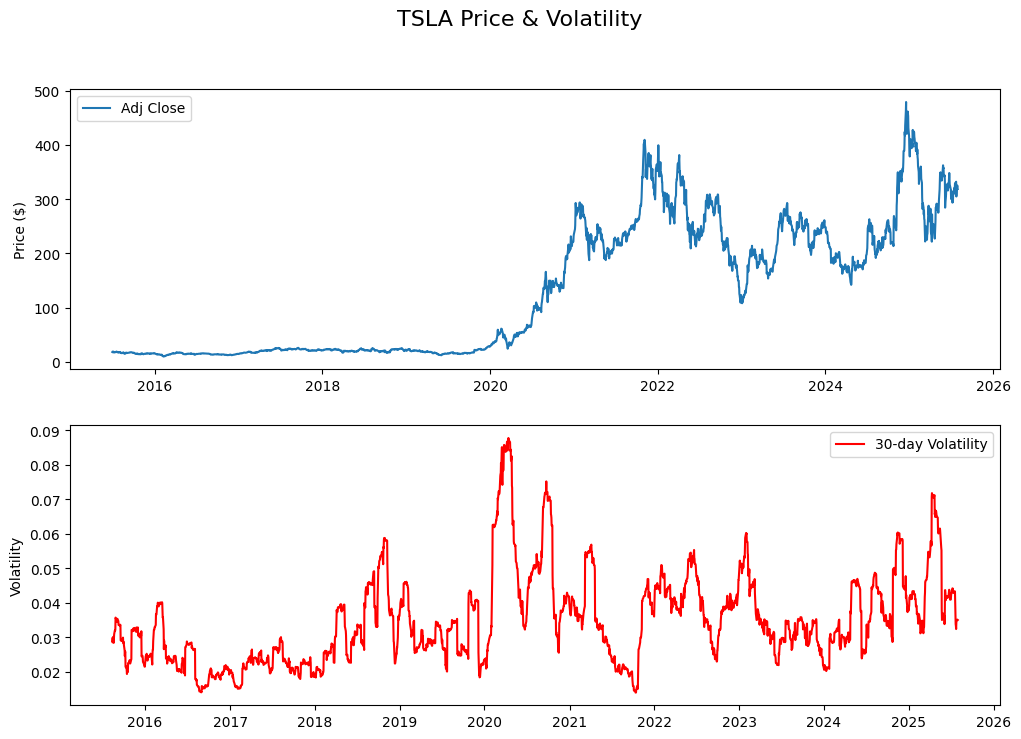

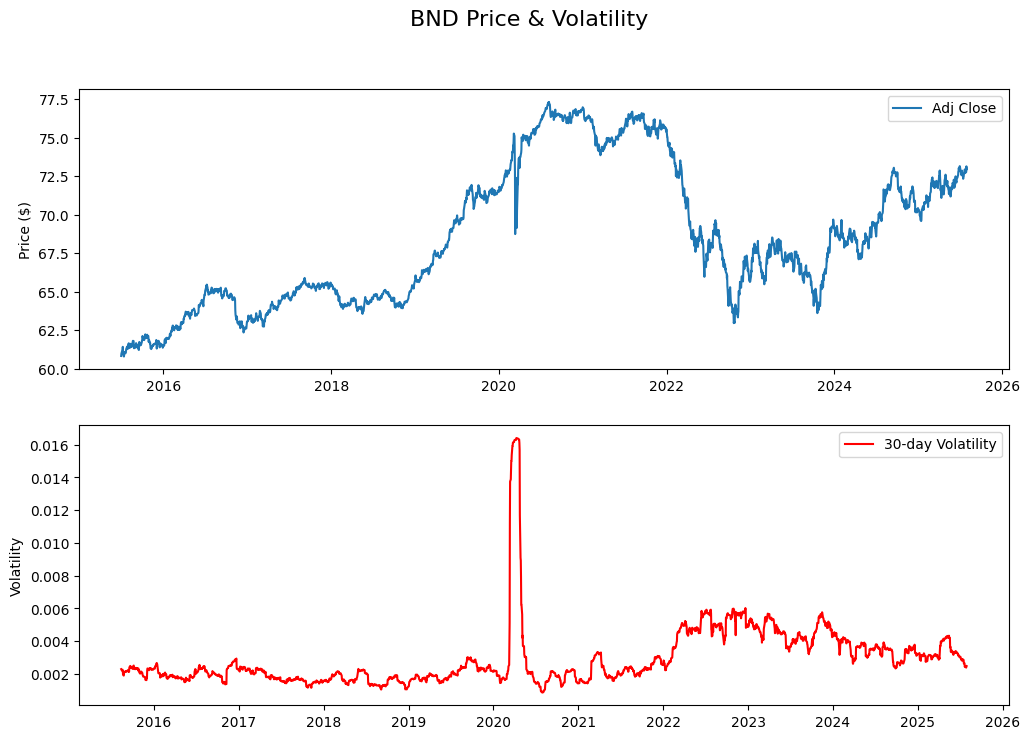

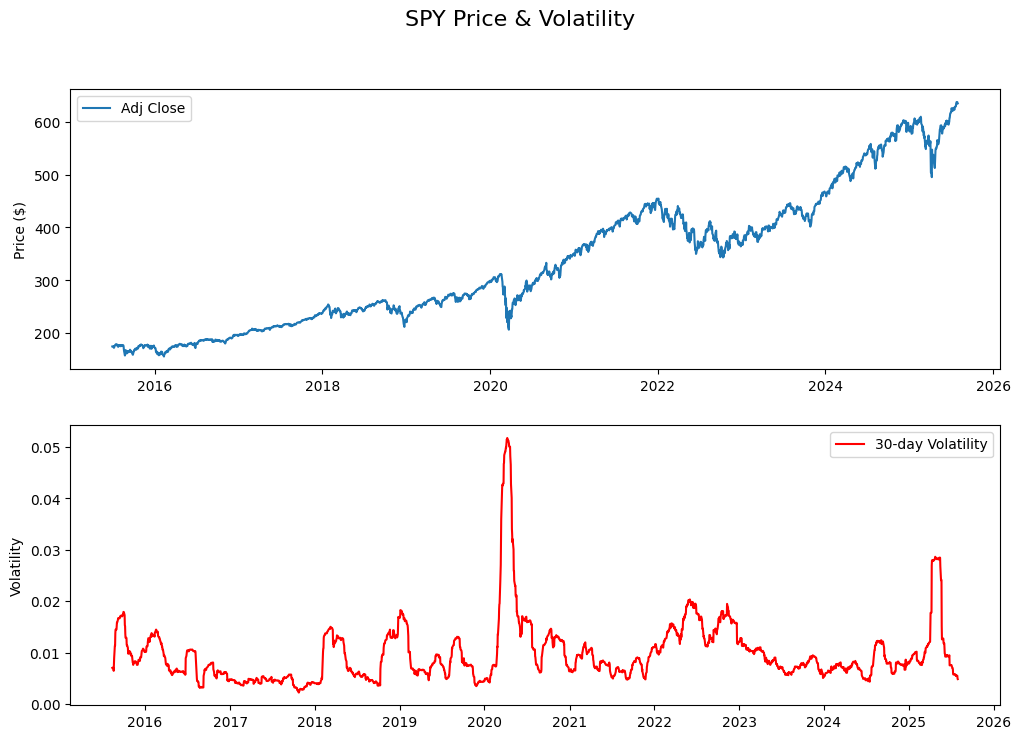

In [8]:
for ticker, df in assets.items():
    fig, axes = plt.subplots(2, 1, figsize=(12,8))
    fig.suptitle(f"{ticker} Price & Volatility", fontsize=16)

    # Price over time
    axes[0].plot(df.index, df['Adj Close'], label='Adj Close')
    axes[0].set_ylabel('Price ($)')
    axes[0].legend()

    # Volatility over time
    axes[1].plot(df.index, df['Rolling_Volatility'], color='red', label='30-day Volatility')
    axes[1].set_ylabel('Volatility')
    axes[1].legend()

    plt.show()


# Outlier Detection (High/Low Returns)

In [9]:
for ticker, df in assets.items():
    threshold = df['Daily_Return'].std() * 3
    outliers = df[(df['Daily_Return'] > threshold) | (df['Daily_Return'] < -threshold)]

    print(f"--- {ticker} Outliers ---")
    print(outliers[['Daily_Return']])


--- TSLA Outliers ---
Price       Daily_Return
Date                    
2018-08-02      0.161880
2018-09-28     -0.139015
2018-10-01      0.173471
2018-10-23      0.127189
2019-01-18     -0.129711
2019-07-25     -0.136137
2019-10-24      0.176692
2020-02-03      0.198949
2020-02-04      0.137256
2020-02-05     -0.171758
2020-02-27     -0.128146
2020-03-02      0.113220
2020-03-09     -0.135725
2020-03-12     -0.116172
2020-03-16     -0.185778
2020-03-18     -0.160344
2020-03-19      0.183877
2020-03-24      0.162817
2020-04-13      0.136038
2020-07-06      0.134794
2020-08-12      0.131236
2020-08-17      0.112031
2020-08-31      0.125689
2020-09-08     -0.210628
2020-09-14      0.125832
2021-03-09      0.196412
2021-10-25      0.126616
2021-11-09     -0.119903
2022-01-03      0.135317
2022-01-27     -0.115542
2022-04-26     -0.121841
2022-12-27     -0.114089
2023-01-03     -0.122422
2024-01-25     -0.121253
2024-04-24      0.120611
2024-04-29      0.153069
2024-07-24     -0.123346
202

# Stationarity Test (ADF)

In [10]:
def adf_test(series, title=''):
    print(f'Augmented Dickey-Fuller Test: {title}')
    result = adfuller(series.dropna(), autolag='AIC')
    labels = ['ADF Statistic', 'p-value', '# Lags Used', '# Observations']
    for value, label in zip(result[:4], labels):
        print(f'{label} : {value}')
    if result[1] <= 0.05:
        print("✅ Stationary (Reject H0)")
    else:
        print("❌ Non-Stationary (Fail to Reject H0)")

# Test for each asset's closing price and returns
for ticker, df in assets.items():
    adf_test(df['Adj Close'], title=f"{ticker} - Adj Close")
    adf_test(df['Daily_Return'], title=f"{ticker} - Daily Return")
    print("\n")


Augmented Dickey-Fuller Test: TSLA - Adj Close
ADF Statistic : -1.4188720053968273
p-value : 0.5731959514207222
# Lags Used : 27
# Observations : 2507
❌ Non-Stationary (Fail to Reject H0)
Augmented Dickey-Fuller Test: TSLA - Daily Return
ADF Statistic : -34.68109047254185
p-value : 0.0
# Lags Used : 1
# Observations : 2532
✅ Stationary (Reject H0)


Augmented Dickey-Fuller Test: BND - Adj Close
ADF Statistic : -1.5362454666177068
p-value : 0.5155111548906623
# Lags Used : 13
# Observations : 2521
❌ Non-Stationary (Fail to Reject H0)
Augmented Dickey-Fuller Test: BND - Daily Return
ADF Statistic : -9.889755806215353
p-value : 3.583978865990605e-17
# Lags Used : 23
# Observations : 2510
✅ Stationary (Reject H0)


Augmented Dickey-Fuller Test: SPY - Adj Close
ADF Statistic : 0.6908123743344297
p-value : 0.9896527200219558
# Lags Used : 9
# Observations : 2525
❌ Non-Stationary (Fail to Reject H0)
Augmented Dickey-Fuller Test: SPY - Daily Return
ADF Statistic : -16.264376617991392
p-value :

# Risk Metrics (VaR & Sharpe Ratio)

In [11]:
risk_free_rate = 0.02  # Assume 2% annual risk-free rate

for ticker, df in assets.items():
    returns = df['Daily_Return'].dropna()

    # Value at Risk (95%)
    var_95 = np.percentile(returns, 5)

    # Sharpe Ratio
    sharpe_ratio = (returns.mean() - (risk_free_rate/252)) / returns.std() * np.sqrt(252)

    print(f"--- {ticker} Risk Metrics ---")
    print(f"VaR (95%): {var_95:.4f}")
    print(f"Sharpe Ratio: {sharpe_ratio:.4f}")
    print("\n")


--- TSLA Risk Metrics ---
VaR (95%): -0.0547
Sharpe Ratio: 0.7446


--- BND Risk Metrics ---
VaR (95%): -0.0049
Sharpe Ratio: -0.0073


--- SPY Risk Metrics ---
VaR (95%): -0.0172
Sharpe Ratio: 0.6844


